In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('full_paired-10mins.csv')

In [3]:
df[:2]

,Unnamed: 0,window,sum(num_people),sum(num_groups),sum(sum_velocities),sum(num_velocities),avg(num_people),x_centers,y_centers
0,0,"Row(start=datetime.datetime(2019, 4, 10, 0, 20...",1,1,0.000,0,0.001389,[0.449],[0.335]
1,1,"Row(start=datetime.datetime(2019, 4, 10, 0, 30...",7,7,0.014,1,0.005833,"[0.709, 0.691, 0.718, 0.718, 0.455, 0.421, 0.812]","[0.339, 0.362, 0.459, 0.466, 0.731, 0.764, 0.56]"


## Get averages from df

In [4]:
def get_averages(df):
    df['avg_group_size'] = df['sum(num_people)'] / df['sum(num_groups)']
    df['avg_velocity'] = df['sum(sum_velocities)'] / df['sum(num_velocities)']
    df.rename(columns={'avg(num_people)': 'avg_num_people', 'window': 'start',
                       'sum(num_people)': 'sum_num_people', 
                       'sum(num_groups)': 'sum_num_groups',
                       'sum(sum_velocities)': 'sum_window_velocities',
                       'sum(num_velocities)': 'sum_num_velocities'}, 
              inplace=True)
    df.fillna(0., inplace=True)
#     df.drop(columns=['Unnamed: 0', 'sum(num_people)', 'sum(num_groups)',
#                      'sum(sum_velocities)', 'sum(num_velocities)'],
#             inplace=True)
    return df

In [5]:
df = get_averages(df)

In [6]:
df.columns

Index(['Unnamed: 0', 'start', 'sum_num_people', 'sum_num_groups',
       'sum_window_velocities', 'sum_num_velocities', 'avg_num_people',
       'x_centers', 'y_centers', 'avg_group_size', 'avg_velocity'],
      dtype='object')

In [7]:
df[:2]

,Unnamed: 0,start,sum_num_people,sum_num_groups,sum_window_velocities,sum_num_velocities,avg_num_people,x_centers,y_centers,avg_group_size,avg_velocity
0,0,"Row(start=datetime.datetime(2019, 4, 10, 0, 20...",1,1,0.000,0,0.001389,[0.449],[0.335],1.0,0.000
1,1,"Row(start=datetime.datetime(2019, 4, 10, 0, 30...",7,7,0.014,1,0.005833,"[0.709, 0.691, 0.718, 0.718, 0.455, 0.421, 0.812]","[0.339, 0.362, 0.459, 0.466, 0.731, 0.764, 0.56]",1.0,0.014


## Remove

In [8]:
def filter_window_row(row):
    start, _ = row[4:-1].replace('start=', '').replace('end=', '').split(', datetime.')
    start = start.replace("datetime.", "")
    return eval(start)

In [9]:
df['start'] = df.start.map(filter_window_row)
df.index.name = 'index'

In [10]:
df[:2]

,Unnamed: 0,start,sum_num_people,sum_num_groups,sum_window_velocities,sum_num_velocities,avg_num_people,x_centers,y_centers,avg_group_size,avg_velocity
index,,,,,,,,,,,
0,0,2019-04-10 00:20:00,1,1,0.000,0,0.001389,[0.449],[0.335],1.0,0.000
1,1,2019-04-10 00:30:00,7,7,0.014,1,0.005833,"[0.709, 0.691, 0.718, 0.718, 0.455, 0.421, 0.812]","[0.339, 0.362, 0.459, 0.466, 0.731, 0.764, 0.56]",1.0,0.014


## Aggregate into 24 hour period (i.e. drop dates and convert to time only)

In [11]:
df['trimmed'] = pd.Series([val.time() for val in df['start']])

In [12]:
df[:2]

,Unnamed: 0,start,sum_num_people,sum_num_groups,sum_window_velocities,sum_num_velocities,avg_num_people,x_centers,y_centers,avg_group_size,avg_velocity,trimmed
index,,,,,,,,,,,,
0,0,2019-04-10 00:20:00,1,1,0.000,0,0.001389,[0.449],[0.335],1.0,0.000,00:20:00
1,1,2019-04-10 00:30:00,7,7,0.014,1,0.005833,"[0.709, 0.691, 0.718, 0.718, 0.455, 0.421, 0.812]","[0.339, 0.362, 0.459, 0.466, 0.731, 0.764, 0.56]",1.0,0.014,00:30:00


In [13]:
grouped = df.groupby([df.start.dt.hour])

In [14]:
summed_df = grouped.sum().drop(columns=['avg_group_size', 'avg_velocity', 'avg_num_people'])

In [15]:
summed_df

,Unnamed: 0,sum_num_people,sum_num_groups,sum_window_velocities,sum_num_velocities
start,,,,,
0,9028,2067,1460,26.660868,1290
1,5714,416,304,4.725587,232
2,7440,117,108,0.968519,57
3,1819,46,27,0.528654,23
4,6043,114,107,0.580760,69
5,8262,1961,1479,14.377448,1483
6,6194,15926,12400,322.850734,11489
7,8139,45123,30420,1588.744794,31745
8,9068,131487,76661,7332.993645,101682


In [16]:
# Window size in minutes
window_size = 10
windows_per_hour = 60 / window_size
fps = 2
seconds_in_hour = 3600
frames_per_hour = seconds_in_hour * fps

In [17]:
summed_df['avg_group_size'] = summed_df['sum_num_people'] / summed_df['sum_num_groups']

In [18]:
summed_df['avg_velocity'] = summed_df['sum_window_velocities'] / summed_df['sum_num_velocities']

In [19]:
# Get average number of people per frame
# First, get average within 10-minute window 
# Convert to hour by multiplying by 6
# Then for each hour, there are 3600 seconds, and 3600*2 = frames
summed_df['avg_num_people'] = grouped.sum_num_people.mean() * windows_per_hour / frames_per_hour

In [20]:
summed_df

,Unnamed: 0,sum_num_people,sum_num_groups,sum_window_velocities,sum_num_velocities,avg_group_size,avg_velocity,avg_num_people
start,,,,,,,,
0,9028,2067,1460,26.660868,1290,1.415753,0.020667,0.057417
1,5714,416,304,4.725587,232,1.368421,0.020369,0.015072
2,7440,117,108,0.968519,57,1.083333,0.016992,0.003750
3,1819,46,27,0.528654,23,1.703704,0.022985,0.002738
4,6043,114,107,0.580760,69,1.065421,0.008417,0.004130
5,8262,1961,1479,14.377448,1483,1.325896,0.009695,0.060525
6,6194,15926,12400,322.850734,11489,1.284355,0.028101,0.603258
7,8139,45123,30420,1588.744794,31745,1.483333,0.050047,1.446250
8,9068,131487,76661,7332.993645,101682,1.715175,0.072117,3.913304


In [21]:
summed_df.drop(columns=['Unnamed: 0', 'sum_num_people', 'sum_num_groups', 
                        'sum_window_velocities', 'sum_num_velocities'],
               inplace=True)

In [22]:
# Store data as 24x3 matrix
data = np.array([summed_df['avg_group_size'], summed_df['avg_velocity'], summed_df['avg_num_people']]).T

In [23]:
np.savez('frame_averages.npz', data=data)

In [24]:
loaded_data = np.load('frame_averages.npz')['data']

In [25]:
loaded_data

array([[1.41575342e+00, 2.06673397e-02, 5.74166667e-02],
       [1.36842105e+00, 2.03689109e-02, 1.50724638e-02],
       [1.08333333e+00, 1.69915671e-02, 3.75000000e-03],
       [1.70370370e+00, 2.29849592e-02, 2.73809524e-03],
       [1.06542056e+00, 8.41680442e-03, 4.13043478e-03],
       [1.32589588e+00, 9.69484018e-03, 6.05246914e-02],
       [1.28435484e+00, 2.81008559e-02, 6.03257576e-01],
       [1.48333333e+00, 5.00470876e-02, 1.44625000e+00],
       [1.71517460e+00, 7.21169297e-02, 3.91330357e+00],
       [1.98620885e+00, 6.69950518e-02, 5.58079545e+00],
       [2.73718496e+00, 6.60883369e-02, 1.02650439e+01],
       [2.68725640e+00, 6.84037078e-02, 1.21050862e+01],
       [2.25727453e+00, 7.43569006e-02, 1.14448333e+01],
       [2.40656400e+00, 7.66700743e-02, 1.25665064e+01],
       [2.35081888e+00, 7.19515201e-02, 1.26513889e+01],
       [2.38871913e+00, 6.47262190e-02, 1.09482407e+01],
       [2.32541276e+00, 6.75587728e-02, 1.09788288e+01],
       [2.31487920e+00, 6.96680

## Display per-frame averages for comparison during streaming for each hour (start)

In [26]:
summed_df

,avg_group_size,avg_velocity,avg_num_people
start,,,
0,1.415753,0.020667,0.057417
1,1.368421,0.020369,0.015072
2,1.083333,0.016992,0.003750
3,1.703704,0.022985,0.002738
4,1.065421,0.008417,0.004130
5,1.325896,0.009695,0.060525
6,1.284355,0.028101,0.603258
7,1.483333,0.050047,1.446250
8,1.715175,0.072117,3.913304


In [32]:
times = range(24)

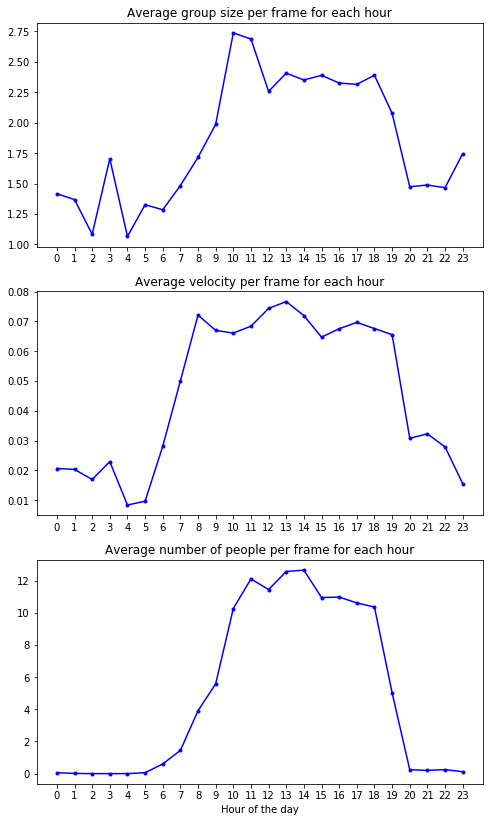

In [50]:
fig, axes = plt.subplots(3, 1, figsize=(8, 14))

axes[0].plot(times, data[:, 0], 'b.-')
axes[0].set_title('Average group size per frame for each hour')
axes[0].set_xticks(range(24))

axes[1].plot(times, data[:, 1], 'b.-')
axes[1].set_title('Average velocity per frame for each hour')
axes[1].set_xticks(range(24))

axes[2].plot(times, data[:, 2], 'b.-')
axes[2].set_title('Average number of people per frame for each hour')
axes[2].set_xlabel('Hour of the day')
axes[2].set_xticks(range(24))
fig.savefig('perframeanalytics.png')